In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import re

In [7]:
url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
req = requests.get(url)

In [8]:
req

<Response [200]>

In [9]:
soup = BeautifulSoup(req.content)

In [11]:
def scrape_party_wise_results(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', {'class': 'table'})

    # Extract headers
    headers = [header.text.strip() for header in table.find_all('th')]

    # Extract rows
    data = []
    for row in table.find_all('tr'):
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        if cols:  # Only add rows with data
            data.append(cols)

    # Ensure the number of columns match the headers
    max_cols = max(len(row) for row in data)
    if len(headers) != max_cols:
        headers = headers[:max_cols]

    df = pd.DataFrame(data, columns=headers)
    return df

In [12]:
main_url = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"

# Scrape main party-wise results
main_df = scrape_party_wise_results(main_url)
main_df.to_csv('main_party_wise_results.csv', index=False)
main_df.head()


,Party,Won,Leading,Total
0,Bharatiya Janata Party - BJP,240,0,240
1,Indian National Congress - INC,99,0,99
2,Samajwadi Party - SP,37,0,37
3,All India Trinamool Congress - AITC,29,0,29
4,Dravida Munnetra Kazhagam - DMK,22,0,22


In [14]:
!pip install matplotlib seaborn pandas


<ipython-input-15-1636980fe0ee>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party', y='Won', data=df, palette='viridis')


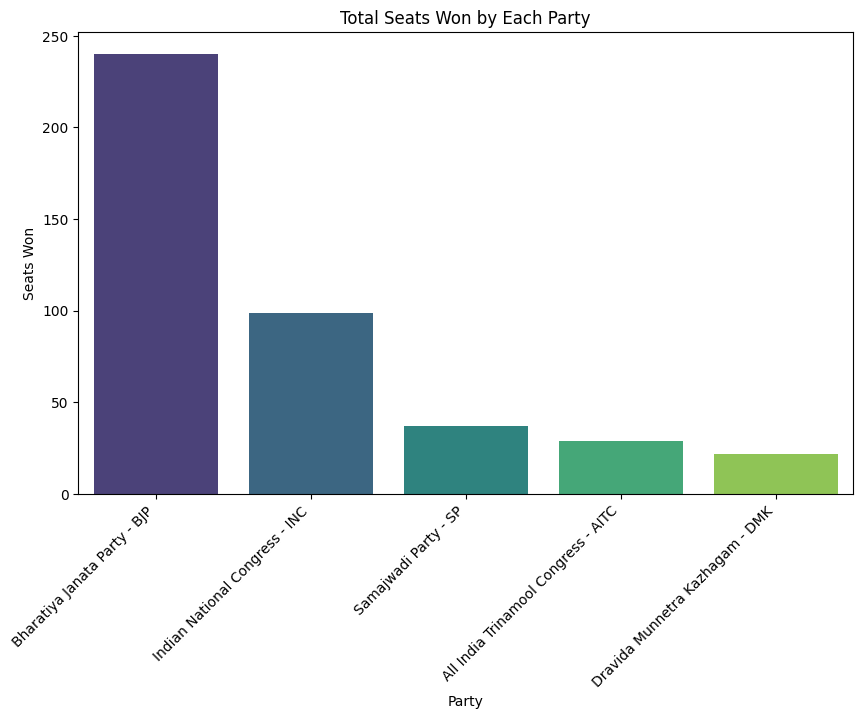

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = {
    'Party': ['Bharatiya Janata Party - BJP', 'Indian National Congress - INC', 'Samajwadi Party - SP',
              'All India Trinamool Congress - AITC', 'Dravida Munnetra Kazhagam - DMK'],
    'Won': [240, 99, 37, 29, 22]
}

df = pd.DataFrame(data)

# Bar chart for seats won by each party
plt.figure(figsize=(10, 6))
sns.barplot(x='Party', y='Won', data=df, palette='viridis')
plt.title('Total Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=45, ha='right')
plt.show()


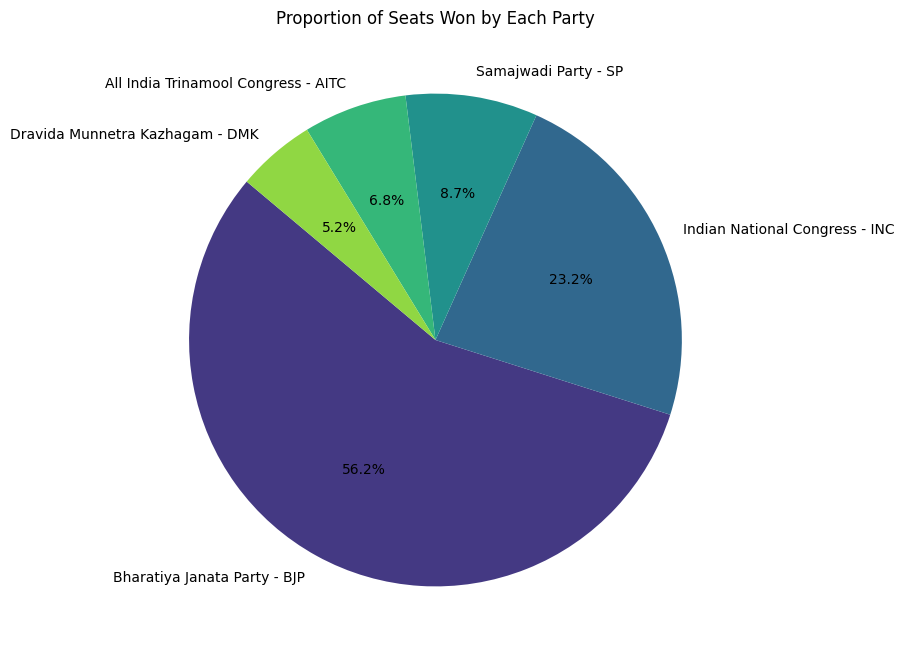

In [16]:
# Pie chart for seats won by each party
plt.figure(figsize=(8, 8))
plt.pie(df['Won'], labels=df['Party'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(df)))
plt.title('Proportion of Seats Won by Each Party')
plt.show()


<ipython-input-17-caa5ae12b834>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party', y='Won', data=df, palette='viridis')


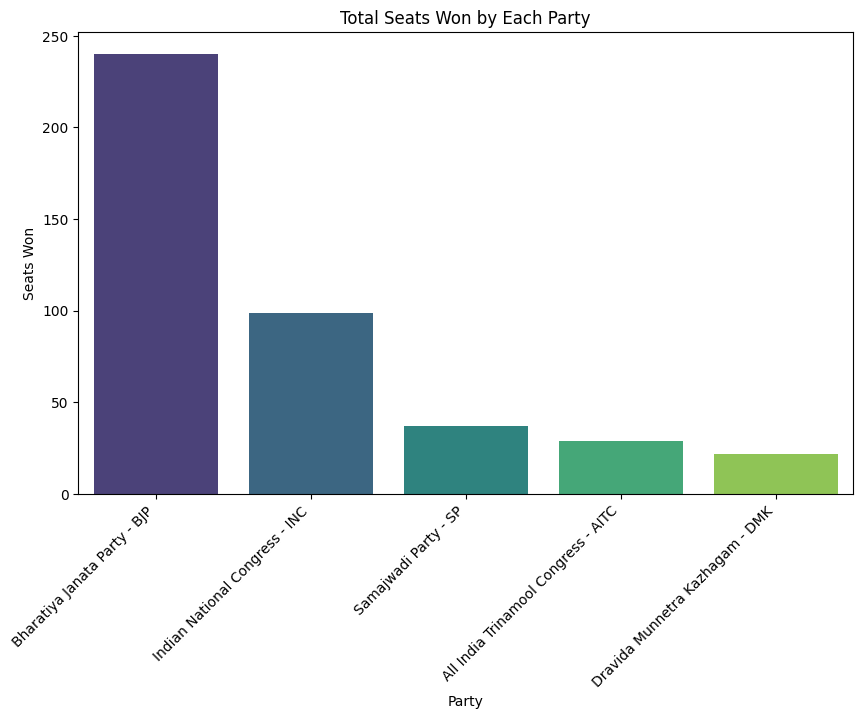

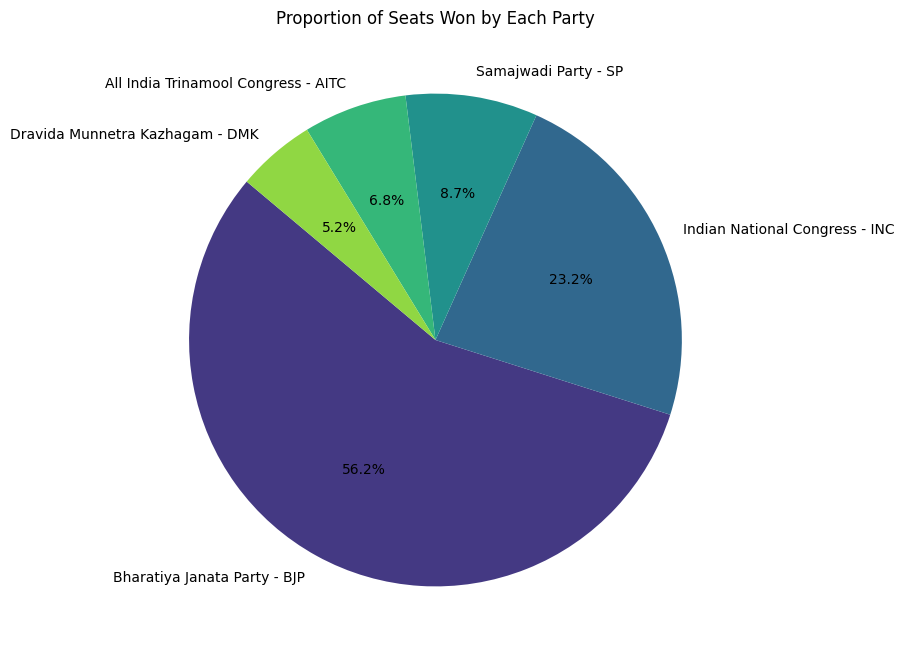

<ipython-input-17-caa5ae12b834>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party', y='Won', data=df_nvr, palette='muted')


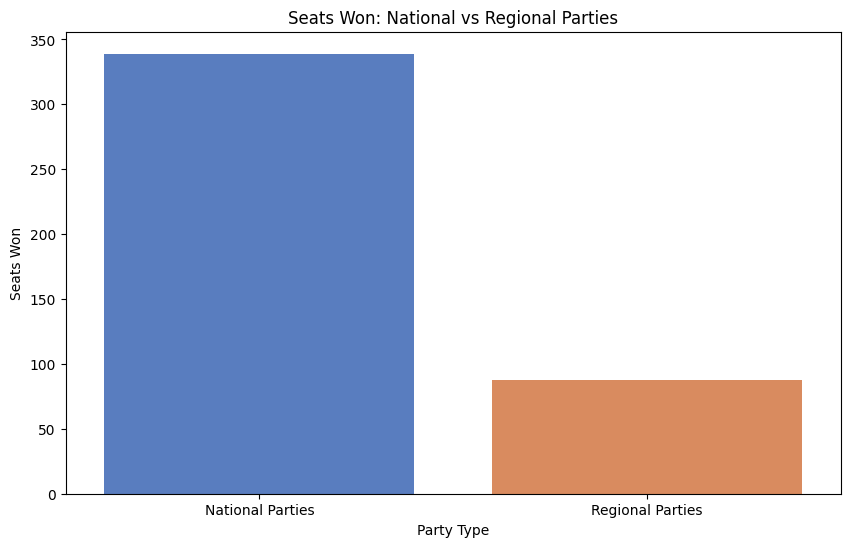

<ipython-input-17-caa5ae12b834>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party', y='Won', data=bjp_inc, palette='coolwarm')


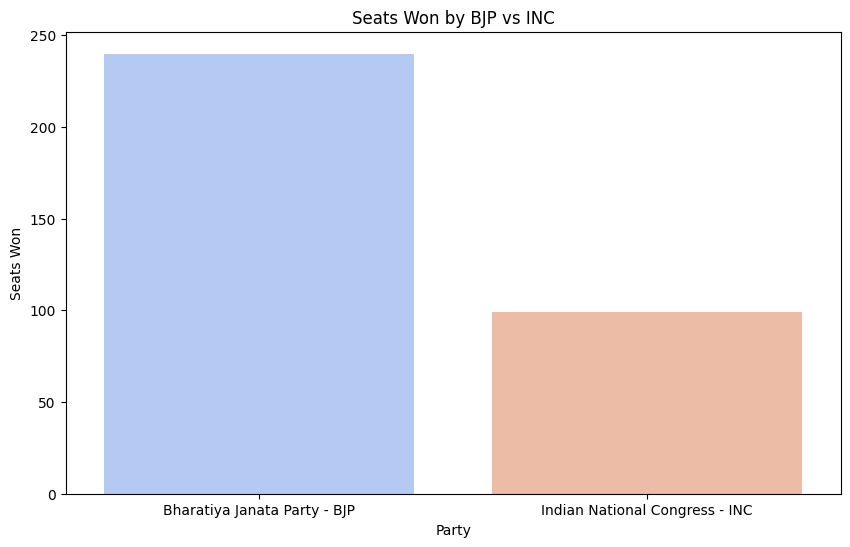

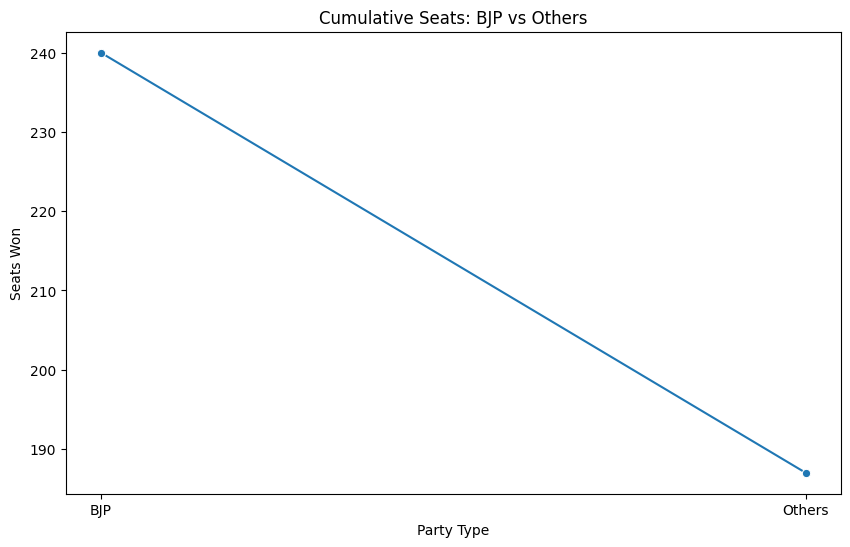

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = {
    'Party': ['Bharatiya Janata Party - BJP', 'Indian National Congress - INC', 'Samajwadi Party - SP',
              'All India Trinamool Congress - AITC', 'Dravida Munnetra Kazhagam - DMK'],
    'Won': [240, 99, 37, 29, 22]
}

df = pd.DataFrame(data)

# 1. Bar chart for total seats won by each party
plt.figure(figsize=(10, 6))
sns.barplot(x='Party', y='Won', data=df, palette='viridis')
plt.title('Total Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2. Pie chart for proportion of seats won by each party
plt.figure(figsize=(8, 8))
plt.pie(df['Won'], labels=df['Party'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(df)))
plt.title('Proportion of Seats Won by Each Party')
plt.show()

# 3. Stacked bar chart for national vs regional parties
national_parties = ['Bharatiya Janata Party - BJP', 'Indian National Congress - INC']
regional_parties = df[~df['Party'].isin(national_parties)]
regional_parties_sum = regional_parties['Won'].sum()
national_vs_regional = {
    'Party': ['National Parties', 'Regional Parties'],
    'Won': [df[df['Party'].isin(national_parties)]['Won'].sum(), regional_parties_sum]
}
df_nvr = pd.DataFrame(national_vs_regional)

plt.figure(figsize=(10, 6))
sns.barplot(x='Party', y='Won', data=df_nvr, palette='muted')
plt.title('Seats Won: National vs Regional Parties')
plt.xlabel('Party Type')
plt.ylabel('Seats Won')
plt.show()

# 4. Bar chart highlighting the difference between BJP and INC
bjp_inc = df[df['Party'].isin(['Bharatiya Janata Party - BJP', 'Indian National Congress - INC'])]

plt.figure(figsize=(10, 6))
sns.barplot(x='Party', y='Won', data=bjp_inc, palette='coolwarm')
plt.title('Seats Won by BJP vs INC')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.show()

# 5. Line chart for cumulative seats of BJP and Others
df['Type'] = df['Party'].apply(lambda x: 'BJP' if x == 'Bharatiya Janata Party - BJP' else 'Others')
cumulative_seats = df.groupby('Type')['Won'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Type', y='Won', data=cumulative_seats, marker='o', sort=False)
plt.title('Cumulative Seats: BJP vs Others')
plt.xlabel('Party Type')
plt.ylabel('Seats Won')
plt.show()


In [19]:
from bs4 import BeautifulSoup
import requests


In [20]:
url = 'https://results.eci.gov.in/AcResultGenJune2024/partywiseresult-S18.htm'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

In [21]:
print(soup)

<!DOCTYPE html>
<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=7" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="300" http-equiv="refresh"/>
<!-- Bootstrap CSS -->
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<link href="css/custom.css" rel="stylesheet"/>
<link href="css/responsive.css" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet"/>
<link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link crossorigin="" href="css/leaflet.css" integrity="sha256-kLaT2GOSpHechhsozzB+flnD+zUyjE2LlfWPgU04xyI=" rel="stylesheet"/>
<script crossorigin="" integrity="sha256-WBkoXOwTeyKclOHuWtc+i2uENFpDZ9YPdf5Hf+D7

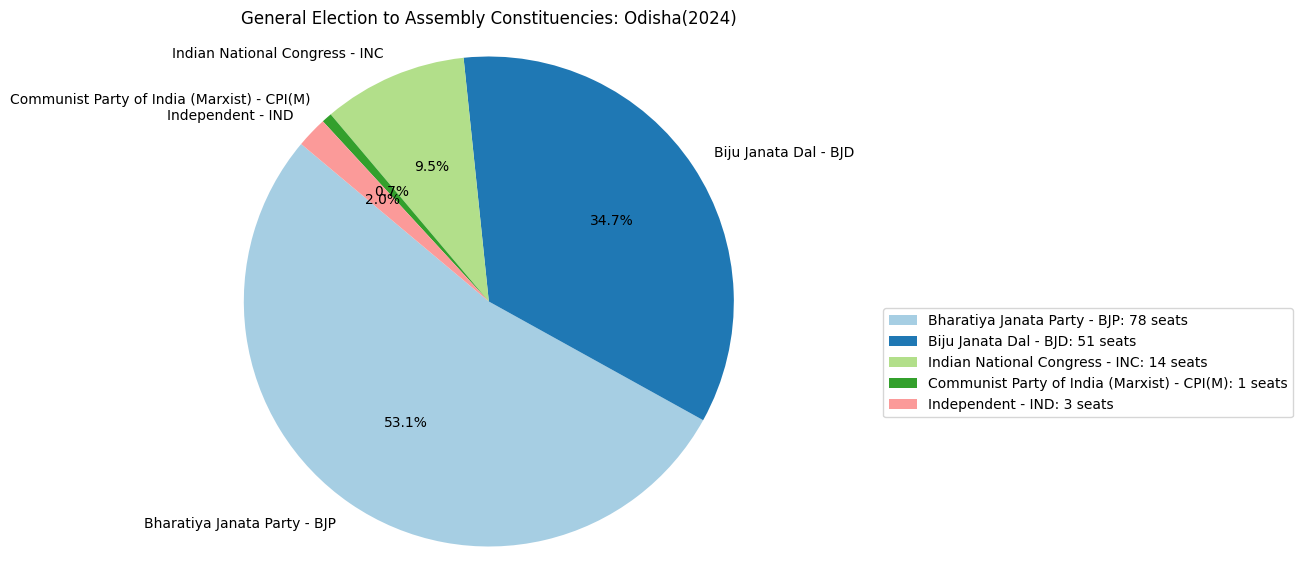

In [22]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


html_content = """
<div class="rslt-table teble-responsive">
    <table class="table">
        <thead>
            <tr>
                <th style="text-align: left;">Party</th>
                <th style="text-align:right">Won</th>
                <th style="text-align:right">Leading</th>
                <th style="text-align:right">Total</th>
            </tr>
        </thead>
        <tbody>
            <tr class="tr">
                <td style="text-align:left">Bharatiya Janata Party - BJP</td>
                <td style="text-align:right"><a href="partywisewinresult-369S18.htm">78</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">78</td>
            </tr>
            <tr class="tr">
                <td style="text-align:left">Biju Janata Dal - BJD</td>
                <td style="text-align:right"><a href="partywisewinresult-350S18.htm">51</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">51</td>
            </tr>
            <tr class="tr">
                <td style="text-align:left">Indian National Congress - INC</td>
                <td style="text-align:right"><a href="partywisewinresult-742S18.htm">14</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">14</td>
            </tr>
            <tr class="tr">
                <td style="text-align:left">Communist Party of India (Marxist) - CPI(M)</td>
                <td style="text-align:right"><a href="partywisewinresult-547S18.htm">1</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">1</td>
            </tr>
            <tr class="tr">
                <td style="text-align:left">Independent - IND</td>
                <td style="text-align:right"><a href="partywisewinresult-743S18.htm">3</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">3</td>
            </tr>
        </tbody>
        <tfoot>
            <tr>
                <th>Total</th>
                <th style="text-align:right">147</th>
                <th style="text-align:right">0</th>
                <th style="text-align:right">147</th>
            </tr>
        </tfoot>
    </table>
</div>
"""

soup = BeautifulSoup(html_content, 'html.parser')

# Initialize lists to store data
parties = []
seats_won = []

# Locate the table containing the election results
table = soup.find('div', class_='rslt-table teble-responsive').find('table')
rows = table.find('tbody').find_all('tr')

for row in rows:
    columns = row.find_all('td')
    if len(columns) >= 3:  # Ensure there are enough columns
        party = columns[0].get_text(strip=True)
        won = int(columns[1].get_text(strip=True))

        parties.append(party)
        seats_won.append(won)

# Step 2: Visualize Data Using Matplotlib
# You can adjust the colors if needed
colors = plt.cm.Paired(range(len(parties)))

plt.figure(figsize=(10, 7))
plt.pie(seats_won, labels=parties, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('General Election to Assembly Constituencies: Odisha(2024)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend with the number of seats won
legend_labels = [f'{party}: {seats} seats' for party, seats in zip(parties, seats_won)]
plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 0.5))

plt.show()


In [23]:
url = 'https://results.eci.gov.in/PcResultGenJune2024/index.htm'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')

In [24]:
print(soup)


<!DOCTYPE html>
<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=7" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="300" http-equiv="refresh"/>
<!-- Bootstrap CSS -->
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<link href="css/custom.css" rel="stylesheet"/>
<link href="css/responsive.css" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet"/>
<link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<title>Election Commission of India</title>
<style type="text/css">
</style>
<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="True")a.BOOMR_config=a.BOOMR_conf

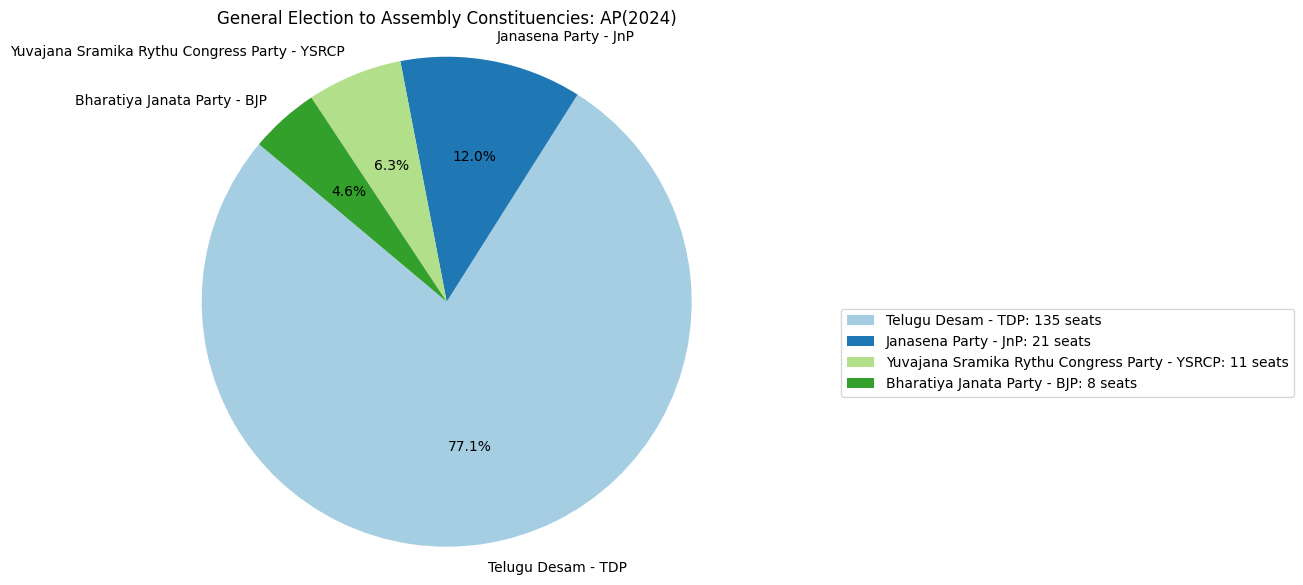

In [25]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Step 1: Scrape Data from the Website
html_content = """
<div class="rslt-table teble-responsive">
    <table class="table">
        <thead>
            <tr>
                <th style="text-align: left;">Party</th>
                <th style="text-align:right">Won</th>
                <th style="text-align:right">Leading</th>
                <th style="text-align:right">Total</th>
            </tr>
        </thead>
        <tbody>
            <tr class="tr">
                <td style="text-align:left">Telugu Desam - TDP</td>
                <td style="text-align:right"><a href="partywisewinresult-1745S01.htm">135</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">135</td>
            </tr>
            <tr class="tr">
                <td style="text-align:left">Janasena Party - JnP</td>
                <td style="text-align:right"><a href="partywisewinresult-860S01.htm">21</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">21</td>
            </tr>
            <tr class="tr">
                <td style="text-align:left">Yuvajana Sramika Rythu Congress Party - YSRCP</td>
                <td style="text-align:right"><a href="partywisewinresult-1888S01.htm">11</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">11</td>
            </tr>
            <tr class="tr">
                <td style="text-align:left">Bharatiya Janata Party - BJP</td>
                <td style="text-align:right"><a href="partywisewinresult-369S01.htm">8</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">8</td>
            </tr>
        </tbody>
        <tfoot>
            <tr>
                <th>Total</th>
                <th style="text-align:right">175</th>
                <th style="text-align:right">0</th>
                <th style="text-align:right">175</th>
            </tr>
        </tfoot>
    </table>
</div>
"""

soup = BeautifulSoup(html_content, 'html.parser')

# Initialize lists to store data
parties = []
seats_won = []

# Locate the table containing the election results
table = soup.find('div', class_='rslt-table teble-responsive').find('table')
rows = table.find('tbody').find_all('tr')

for row in rows:
    columns = row.find_all('td')
    if len(columns) >= 3:  # Ensure there are enough columns
        party = columns[0].get_text(strip=True)
        won = int(columns[1].get_text(strip=True))

        parties.append(party)
        seats_won.append(won)

# Step 2: Visualize Data Using Matplotlib
# You can adjust the colors if needed
colors = plt.cm.Paired(range(len(parties)))

plt.figure(figsize=(10, 7))
plt.pie(seats_won, labels=parties, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('General Election to Assembly Constituencies: AP(2024)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend with the number of seats won
legend_labels = [f'{party}: {seats} seats' for party, seats in zip(parties, seats_won)]
plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 0.5))

plt.show()

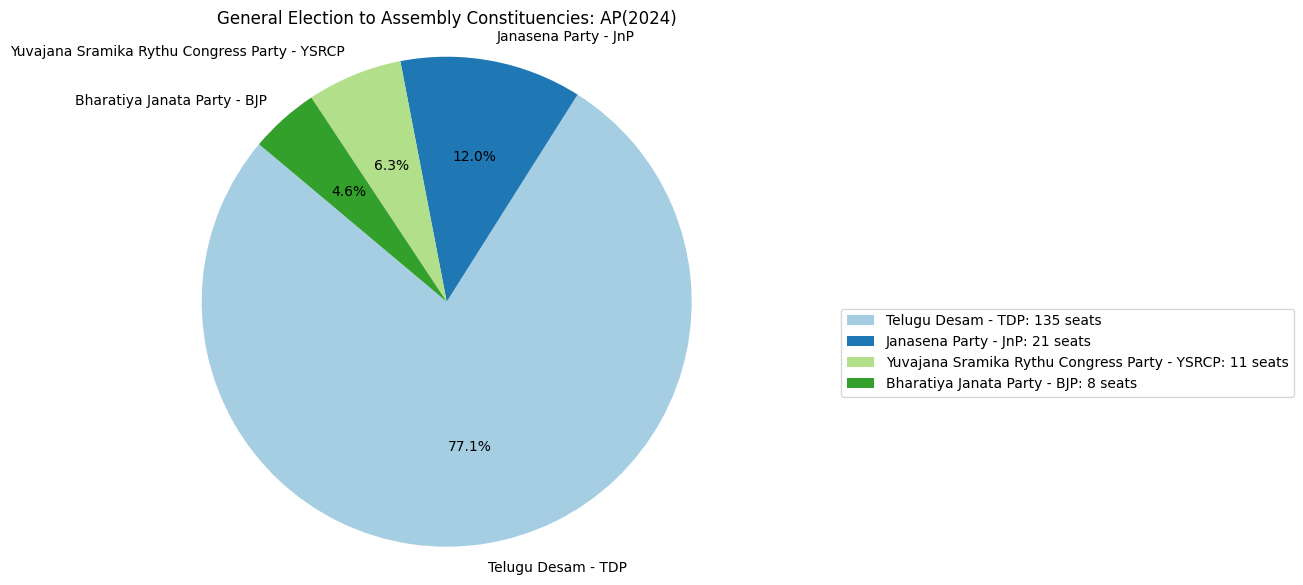

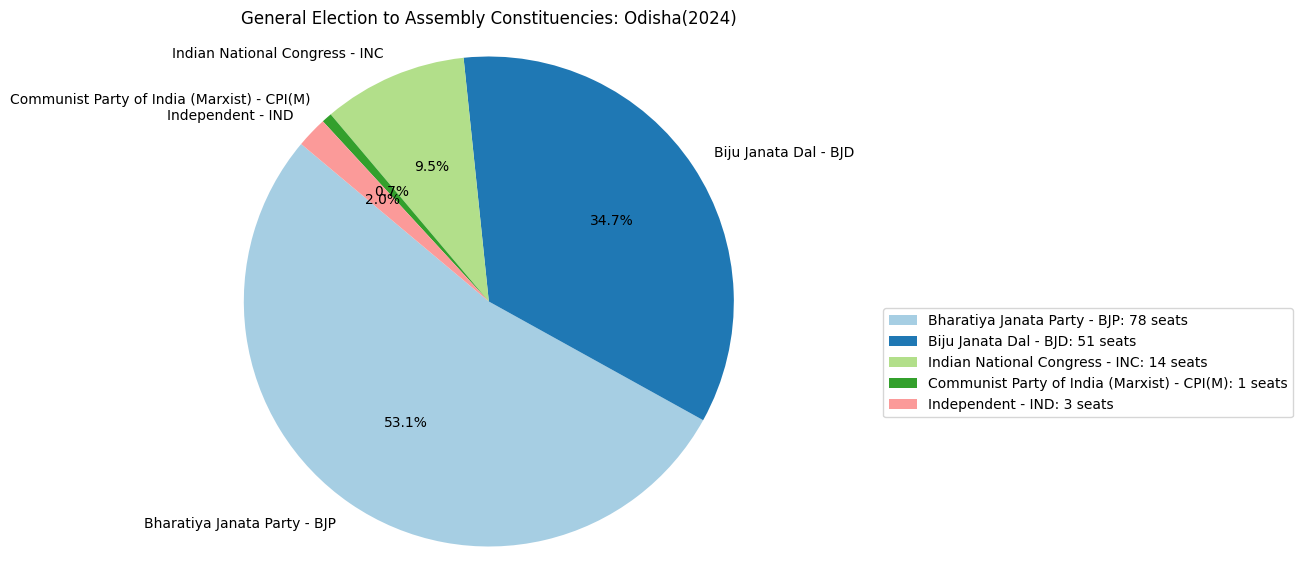

{'Andhra Pradesh': {'Telugu Desam - TDP': 135,
  'Janasena Party - JnP': 21,
  'Yuvajana Sramika Rythu Congress Party - YSRCP': 11,
  'Bharatiya Janata Party - BJP': 8},
 'Odisha': {'Bharatiya Janata Party - BJP': 78,
  'Biju Janata Dal - BJD': 51,
  'Indian National Congress - INC': 14,
  'Communist Party of India (Marxist) - CPI(M)': 1,
  'Independent - IND': 3}}

In [26]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

def scrape_election_results(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')

    parties = []
    seats_won = []

    table = soup.find('div', class_='rslt-table teble-responsive').find('table')
    rows = table.find('tbody').find_all('tr')

    for row in rows:
        columns = row.find_all('td')
        if len(columns) >= 3:  # Ensure there are enough columns
            party = columns[0].get_text(strip=True)
            won = int(columns[1].get_text(strip=True))

            parties.append(party)
            seats_won.append(won)

    return parties, seats_won

# HTML content for Andhra Pradesh
html_content_ap = """
<div class="rslt-table teble-responsive">
    <table class="table">
        <thead>
            <tr>
                <th style="text-align: left;">Party</th>
                <th style="text-align:right">Won</th>
                <th style="text-align:right">Leading</th>
                <th style="text-align:right">Total</th>
            </tr>
        </thead>
        <tbody>
            <tr class="tr">
                <td style="text-align:left">Telugu Desam - TDP</td>
                <td style="text-align:right"><a href="partywisewinresult-1745S01.htm">135</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">135</td>
            </tr>
            <tr class="tr">
                <td style="text-align:left">Janasena Party - JnP</td>
                <td style="text-align:right"><a href="partywisewinresult-860S01.htm">21</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">21</td>
            </tr>
            <tr class="tr">
                <td style="text-align:left">Yuvajana Sramika Rythu Congress Party - YSRCP</td>
                <td style="text-align:right"><a href="partywisewinresult-1888S01.htm">11</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">11</td>
            </tr>
            <tr class="tr">
                <td style="text-align:left">Bharatiya Janata Party - BJP</td>
                <td style="text-align:right"><a href="partywisewinresult-369S01.htm">8</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">8</td>
            </tr>
        </tbody>
        <tfoot>
            <tr>
                <th>Total</th>
                <th style="text-align:right">175</th>
                <th style="text-align:right">0</th>
                <th style="text-align:right">175</th>
            </tr>
        </tfoot>
    </table>
</div>
"""

# HTML content for Odisha
html_content_odisha = """
<div class="rslt-table teble-responsive">
    <table class="table">
        <thead>
            <tr>
                <th style="text-align: left;">Party</th>
                <th style="text-align:right">Won</th>
                <th style="text-align:right">Leading</th>
                <th style="text-align:right">Total</th>
            </tr>
        </thead>
        <tbody>
            <tr class="tr">
                <td style="text-align:left">Bharatiya Janata Party - BJP</td>
                <td style="text-align:right"><a href="partywisewinresult-369S18.htm">78</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">78</td>
            </tr>
            <tr class="tr">
                <td style="text-align:left">Biju Janata Dal - BJD</td>
                <td style="text-align:right"><a href="partywisewinresult-350S18.htm">51</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">51</td>
            </tr>
            <tr class="tr">
                <td style="text-align:left">Indian National Congress - INC</td>
                <td style="text-align:right"><a href="partywisewinresult-742S18.htm">14</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">14</td>
            </tr>
            <tr class="tr">
                <td style="text-align:left">Communist Party of India (Marxist) - CPI(M)</td>
                <td style="text-align:right"><a href="partywisewinresult-547S18.htm">1</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">1</td>
            </tr>
            <tr class="tr">
                <td style="text-align:left">Independent - IND</td>
                <td style="text-align:right"><a href="partywisewinresult-743S18.htm">3</a></td>
                <td style="text-align:right">0</td>
                <td style="text-align:right">3</td>
            </tr>
        </tbody>
        <tfoot>
            <tr>
                <th>Total</th>
                <th style="text-align:right">147</th>
                <th style="text-align:right">0</th>
                <th style="text-align:right">147</th>
            </tr>
        </tfoot>
    </table>
</div>
"""

# Scrape data for Andhra Pradesh
parties_ap, seats_won_ap = scrape_election_results(html_content_ap)

# Scrape data for Odisha
parties_odisha, seats_won_odisha = scrape_election_results(html_content_odisha)

# Function to visualize election results
def visualize_election_results(parties, seats_won, title):
    colors = plt.cm.Paired(range(len(parties)))

    plt.figure(figsize=(10, 7))
    plt.pie(seats_won, labels=parties, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Add a legend with the number of seats won
    legend_labels = [f'{party}: {seats} seats' for party, seats in zip(parties, seats_won)]
    plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 0.5))

    plt.show()

# Visualize results for Andhra Pradesh
visualize_election_results(parties_ap, seats_won_ap, 'General Election to Assembly Constituencies: AP(2024)')

# Visualize results for Odisha
visualize_election_results(parties_odisha, seats_won_odisha, 'General Election to Assembly Constituencies: Odisha(2024)')

# Combine the data for insights
combined_data = {
    'Andhra Pradesh': dict(zip(parties_ap, seats_won_ap)),
    'Odisha': dict(zip(parties_odisha, seats_won_odisha))
}

# Print combined data for insights
combined_data


In [29]:
 data = pd.read_csv('election_results_2024.csv')

In [30]:
data.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


<ipython-input-34-34eb37e2a013>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seats_won.index, y=seats_won.values, palette='viridis')


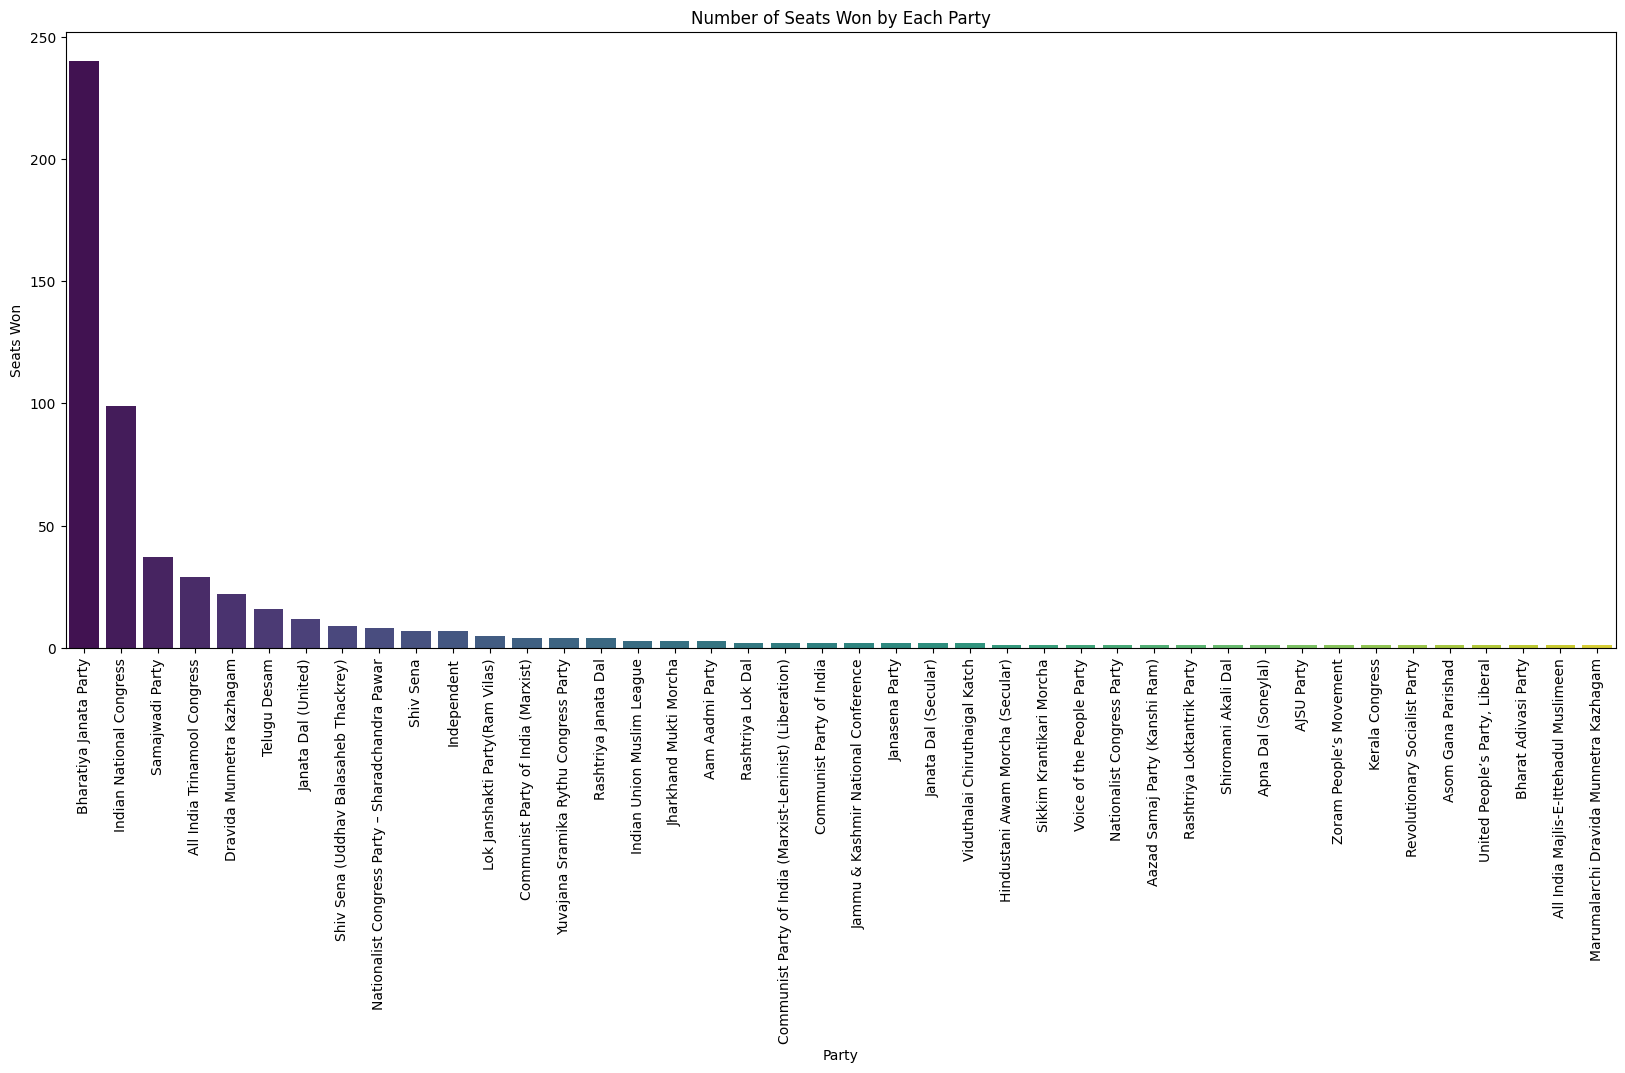

In [34]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

leading_party_highest_votes = party_votes.idxmax()
leading_party_lowest_votes = party_votes.idxmin()

# Number of seats won by each party
seats_won = data['Leading Party'].value_counts()

# Plot number of seats won by each party
plt.figure(figsize=(20, 8))
sns.barplot(x=seats_won.index, y=seats_won.values, palette='viridis')
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)
plt.show()

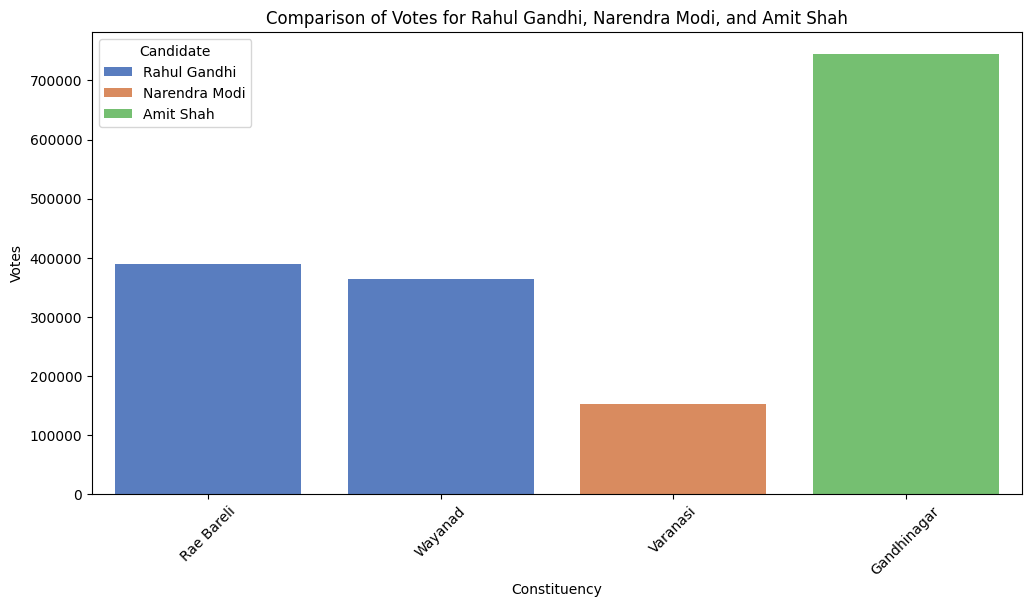

In [35]:
rahul_entries = data[data['Leading Candidate'] == 'RAHUL GANDHI']
modi_entries = data[data['Leading Candidate'] == 'NARENDRA MODI']
amit_entries = data[data['Leading Candidate'] == 'AMIT SHAH']

# Get the votes for Rahul Gandhi, Narendra Modi, and Amit Shah
rahul_votes = rahul_entries['Margin'].values
modi_votes = modi_entries['Margin'].values[0] if not modi_entries.empty else 0
amit_votes = amit_entries['Margin'].values[0] if not amit_entries.empty else 0

# Get the original constituency names for Rahul Gandhi
rahul_constituencies = list(rahul_entries['Constituency'])

# Get the original constituency name for Narendra Modi
modi_constituency = modi_entries['Constituency'].values[0] if not modi_entries.empty else "Modi Constituency"

# Get the original constituency name for Amit Shah
amit_constituency = amit_entries['Constituency'].values[0] if not amit_entries.empty else "Amit Shah Constituency"

# Combine the data
data_to_plot = pd.DataFrame({
    'Candidate': ['Rahul Gandhi'] * len(rahul_votes) + ['Narendra Modi', 'Amit Shah'],
    'Constituency': rahul_constituencies + [modi_constituency, amit_constituency],
    'Votes': list(rahul_votes) + [modi_votes, amit_votes]
})

# Plot the comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=data_to_plot, x='Constituency', y='Votes', hue='Candidate', palette='muted')
plt.title('Comparison of Votes for Rahul Gandhi, Narendra Modi, and Amit Shah')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.show()

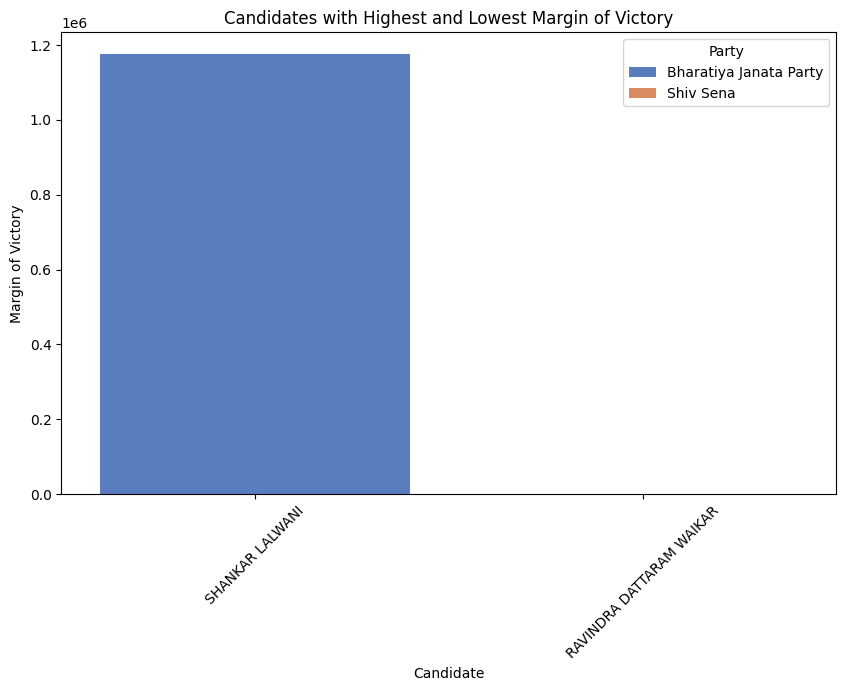

In [36]:
highest_margin_entry = data.loc[data['Margin'].idxmax()]
lowest_margin_entry = data.loc[data['Margin'].idxmin()]

# Combine the data
data_to_plot = pd.DataFrame({
    'Candidate': [highest_margin_entry['Leading Candidate'], lowest_margin_entry['Leading Candidate']],
    'Party': [highest_margin_entry['Leading Party'], lowest_margin_entry['Leading Party']],
    'Margin': [highest_margin_entry['Margin'], lowest_margin_entry['Margin']]
})

# Plot the comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=data_to_plot, x='Candidate', y='Margin', hue='Party', palette='muted')
plt.title('Candidates with Highest and Lowest Margin of Victory')
plt.xlabel('Candidate')
plt.ylabel('Margin of Victory')
plt.xticks(rotation=45)
plt.show()

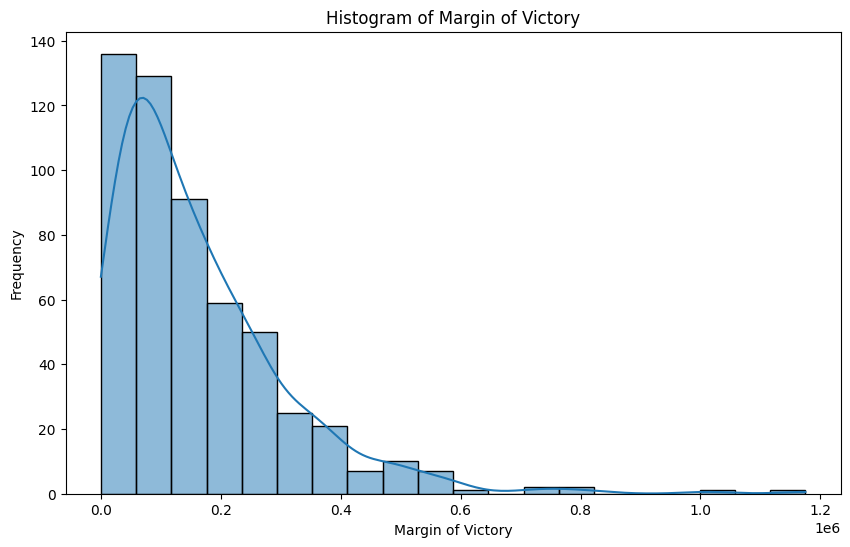

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Margin'], bins=20, kde=True)
plt.title('Histogram of Margin of Victory')
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.show()

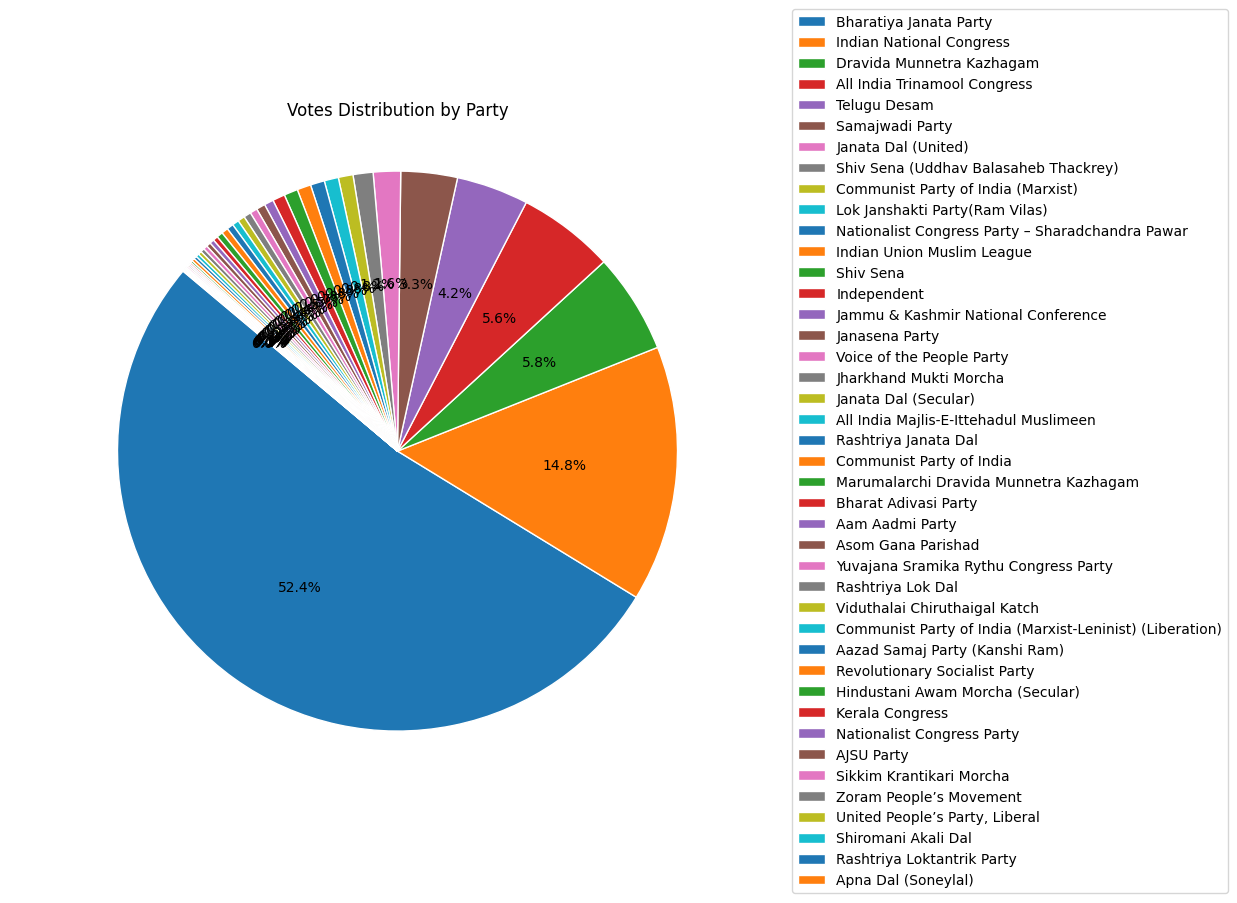

In [38]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(party_votes, labels=None, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal')

plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')


plt.show()

In [39]:
trailing_party_votes = data.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats = data['Trailing Party'].value_counts()

In [40]:
trailing_party_seats


Trailing Party
Indian National Congress                                    167
Bharatiya Janata Party                                      153
All India Anna Dravida Munnetra Kazhagam                     24
Samajwadi Party                                              24
Biju Janata Dal                                              21
Yuvajana Sramika Rythu Congress Party                        21
Rashtriya Janata Dal                                         18
Communist Party of India (Marxist)                           17
All India Trinamool Congress                                 13
Aam Aadmi Party                                              13
Shiv Sena (Uddhav Balasaheb Thackrey)                        10
Shiv Sena                                                     8
Independent                                                   5
Communist Party of India                                      4
Janata Dal (United)                                           4
Nationalist Congress Part

In [41]:
trailing_party_votes


Trailing Party
Indian National Congress                                    35872203.0
Bharatiya Janata Party                                      18160854.0
All India Anna Dravida Munnetra Kazhagam                     5519091.0
Yuvajana Sramika Rythu Congress Party                        4926068.0
Communist Party of India (Marxist)                           2622123.0
Samajwadi Party                                              2365143.0
Biju Janata Dal                                              2236289.0
Rashtriya Janata Dal                                         1962693.0
Bahujan Samaj Party                                          1716321.0
Aam Aadmi Party                                              1277670.0
Shiv Sena (Uddhav Balasaheb Thackrey)                        1131265.0
All India United Democratic Front                            1012476.0
All India Trinamool Congress                                  949763.0
Bharat Rashtra Samith                                         

<ipython-input-42-c029b96aa640>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_votes.index[:10], y=trailing_party_votes.values[:10], palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Indian National Congress'),
  Text(1, 0, 'Bharatiya Janata Party'),
  Text(2, 0, 'All India Anna Dravida Munnetra Kazhagam'),
  Text(3, 0, 'Yuvajana Sramika Rythu Congress Party'),
  Text(4, 0, 'Communist Party of India (Marxist)'),
  Text(5, 0, 'Samajwadi Party'),
  Text(6, 0, 'Biju Janata Dal'),
  Text(7, 0, 'Rashtriya Janata Dal'),
  Text(8, 0, 'Bahujan Samaj Party'),
  Text(9, 0, 'Aam Aadmi Party')])

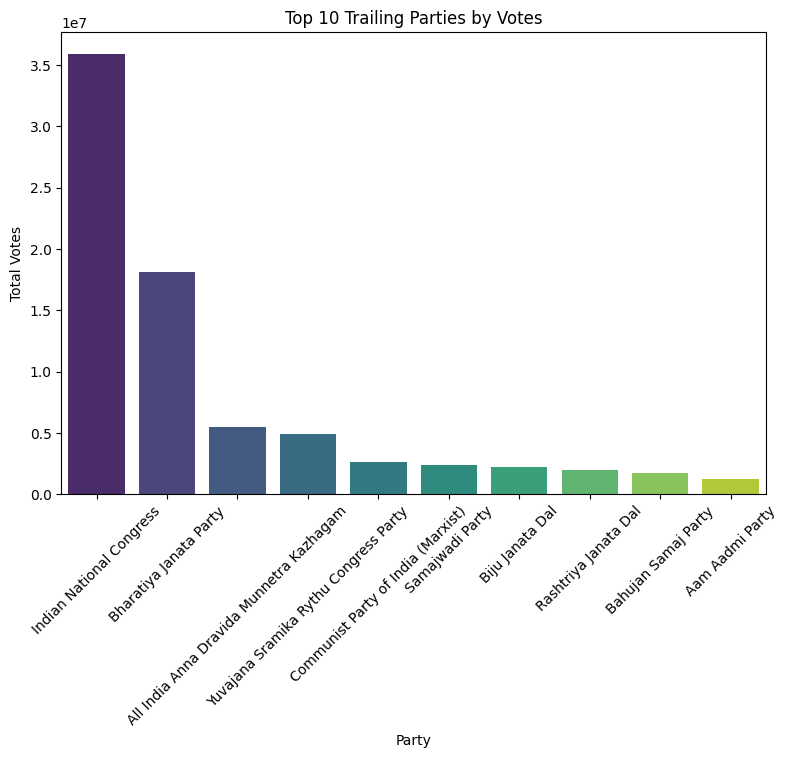

In [42]:
plt.figure(figsize=(20, 6))

# Plot votes distribution by trailing party
plt.subplot(1, 2, 1)
sns.barplot(x=trailing_party_votes.index[:10], y=trailing_party_votes.values[:10], palette='viridis')
plt.title('Top 10 Trailing Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)

<ipython-input-43-346a162bb211>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], palette='viridis')


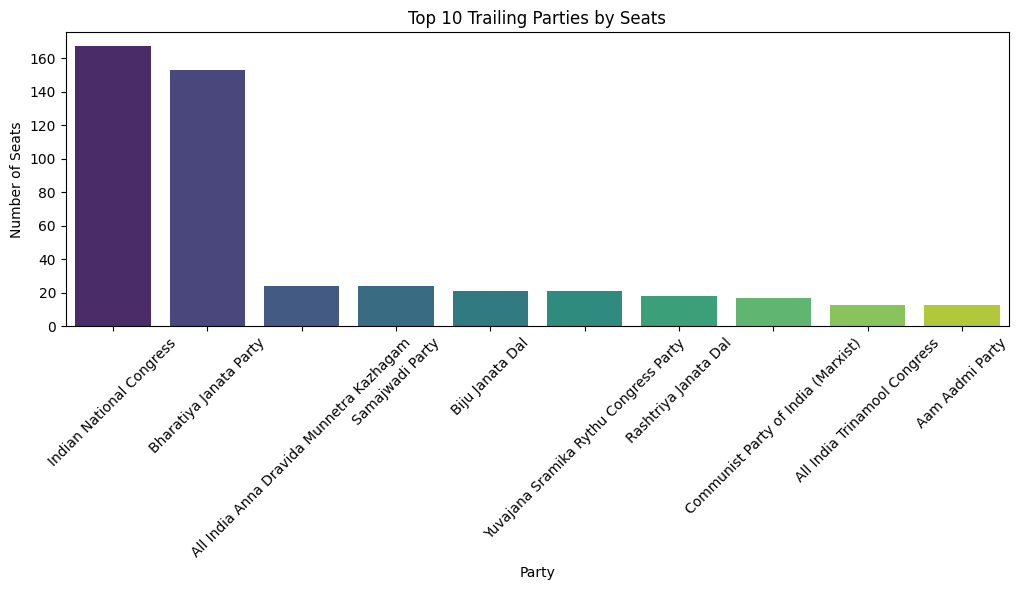

In [43]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], palette='viridis')
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()